In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
import sys
sys.path.append('../')
from src import(
    UNet,
    LandmarkDataset,
    get_valid_transforms,
    load_model_weights,
)

In [2]:
args = dict()
args['base_folder'] = '../data/val'
args['weight_fn'] = r'C:\Users\bed1\src\cephalometric_landmark_detection\checkpoint\0213191615\model_best.pth'
args['num_classes'] = 10

os.path.isdir(args['base_folder'])
os.path.isfile(args['weight_fn'])

True

In [3]:
model = UNet()
model.load_state_dict(torch.load(args['weight_fn'], map_location=torch.device('cpu')))
# model = load_model_weights(model, args['weight_fn'])
model.eval();

In [4]:
dataset = LandmarkDataset(
    base_folder=args['base_folder'],
    transforms=get_valid_transforms(),
)

In [5]:
sample = dataset[15]

image, target = sample['input'], sample['target']
image = image.squeeze().detach().numpy()
true = target.squeeze().detach().numpy()

image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

C:\Users\bed1\miniconda3\envs\hyunseoki\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


GT: [364. 280.] Pred: [361. 285.]
GT: [360. 487.] Pred: [351. 486.]
GT: [430. 431.] Pred: [439. 420.]
GT: [402. 204.] Pred: [406. 196.]
GT: [540. 448.] Pred: [532. 446.]
GT: [638. 449.] Pred: [632. 456.]
GT: [675. 455.] Pred: [671. 463.]
GT: [697. 438.] Pred: [708. 424.]
GT: [688. 451.] Pred: [701. 451.]
GT: [612. 226.] Pred: [609. 231.]


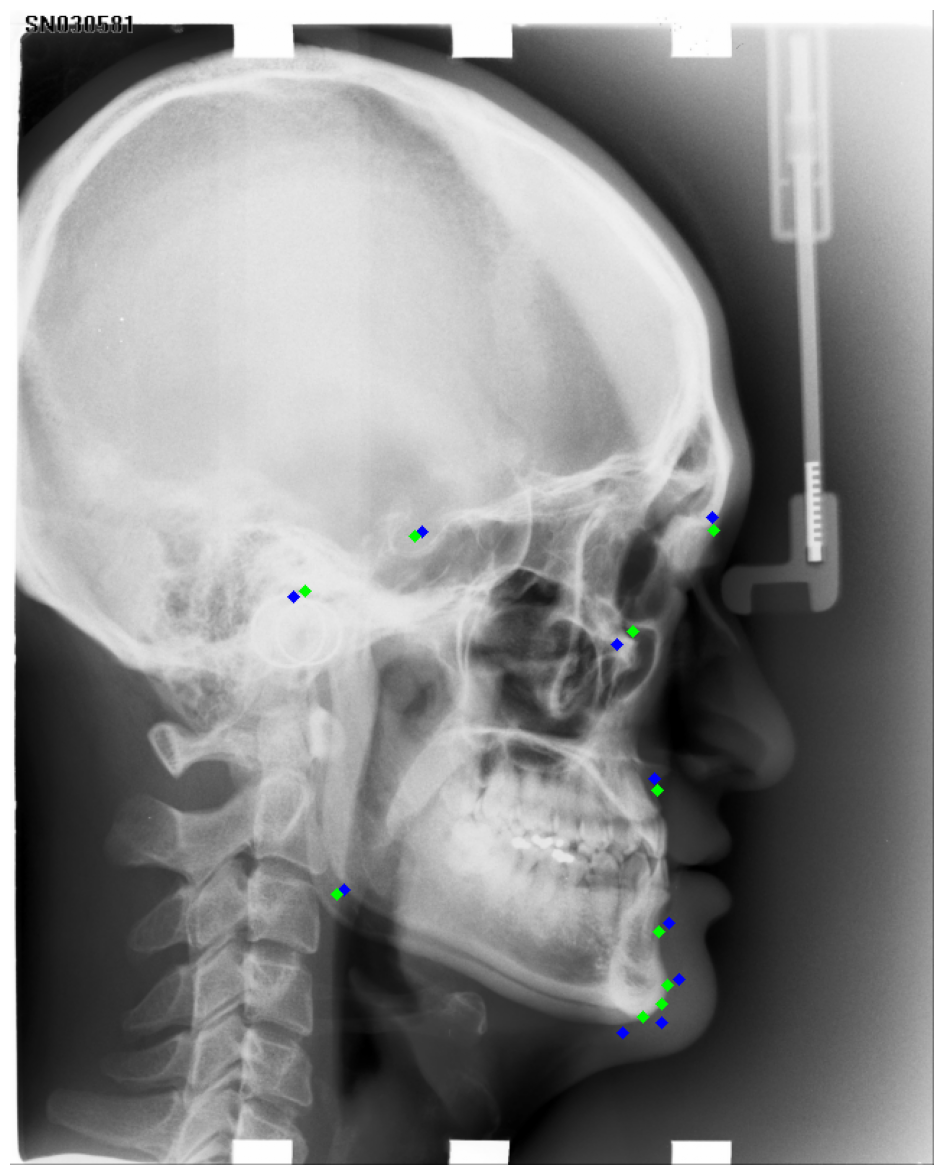

Wall time: 5.3 s


In [6]:
%%time
# sample = random.choice(dataset)
sample = dataset[15]

image, target = sample['input'], sample['target']
pred = model(image.unsqueeze(0))

image = image.squeeze().detach().numpy()
true = target.squeeze().detach().numpy()
pred = pred.squeeze().detach().numpy()
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

for idx in range(args['num_classes']):
    pred_coord = np.array(np.where(pred[idx] > pred[idx].max() * .95))
    pred_coord = np.round(pred_coord.mean(axis=1))

    true_coord = np.array(np.where(true[idx] > true[idx].max() * .95))
    true_coord = np.round(true_coord.mean(axis=1))
    
    print("GT:" , true_coord , "Pred:", pred_coord)
    
    cv2.circle(
        img=image,
        center=(int(pred_coord[1]), int(pred_coord[0])),
        radius=2,
        color=(0, 0, 1), ## Pred
        thickness=3
    )

    cv2.circle(
        img=image,
        center=(int(true_coord[1]), int(true_coord[0])),
        radius=2,
        color=(0, 1, 0), ## True
        thickness=3
    )
    
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(image)
plt.show()